# Ingeniería de Características en el Dataset Titanic

En esta actividad, aplicaremos técnicas de ingeniería de características al dataset Titanic para mejorar el rendimiento de un modelo de clasificación.

In [8]:

# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style='whitegrid')


## 1. Carga y Exploración de Datos

In [9]:

# Cargar los datos
train_data = pd.read_csv('data/train.csv')

# Mostrar las primeras filas
print(train_data.head())

# Información general del dataset
print(train_data.info())

# Revisar valores nulos
print(train_data.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

## 2. Limpieza y Preprocesamiento de Datos

In [10]:

# Imputar valores faltantes en 'Age' con la mediana
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Imputar valores faltantes en 'Embarked' con el modo
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Crear una columna binaria 'Cabina Desconocida'
train_data['Cabin_Known'] = train_data['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

# Eliminar columnas innecesarias
train_data.drop(columns=['Cabin', 'Ticket', 'PassengerId'], inplace=True)


/var/folders/5d/7gh47wqd111dyfvyv6wz8xtw0000gn/T/ipykernel_26767/1545424497.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
/var/folders/5d/7gh47wqd111dyfvyv6wz8xtw0000gn/T/ipykernel_26767/1545424497.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

## 3. Creación de Nuevas Características

In [11]:

# Tamaño de la Familia
train_data['Family_Size'] = train_data['SibSp'] + train_data['Parch'] + 1

# Categoría de Tarifa
train_data['Fare_Category'] = pd.qcut(train_data['Fare'], 4, labels=[1, 2, 3, 4])

# Extraer Títulos desde el Nombre
train_data['Title'] = train_data['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
train_data['Title'] = train_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
train_data['Title'] = train_data['Title'].replace(['Mme'], 'Mrs')
train_data['Title'] = train_data['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer')
train_data.drop(columns=['Name'], inplace=True)

# Codificar variables categóricas
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])
train_data['Title'] = label_encoder.fit_transform(train_data['Title'])


## 4. Modelado y Evaluación

In [12]:

# Separar características y variable objetivo
X = train_data.drop(columns=['Survived'])
y = train_data['Survived']

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo de regresión logística
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predicción y evaluación
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))


Accuracy: 0.8156424581005587
F1-Score: 0.7724137931034483
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



## 5. Interpretación de Resultados

Analizamos las nuevas características creadas y su impacto en el rendimiento del modelo.

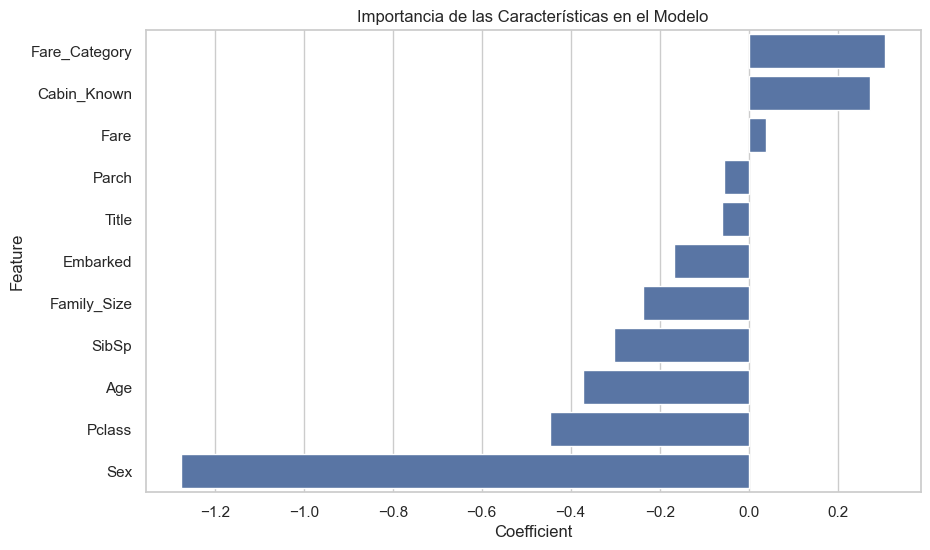

In [13]:

# Importancia de las características
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Importancia de las Características en el Modelo')
plt.show()


## Conclusión

Las nuevas características creadas, como el tamaño de la familia, cabina desconocida, y el título del pasajero, contribuyeron a mejorar el rendimiento del modelo al capturar información útil adicional.